In [51]:
# Data Reading
# Data Preprocessing - Hair Removal

import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.plots import get_image

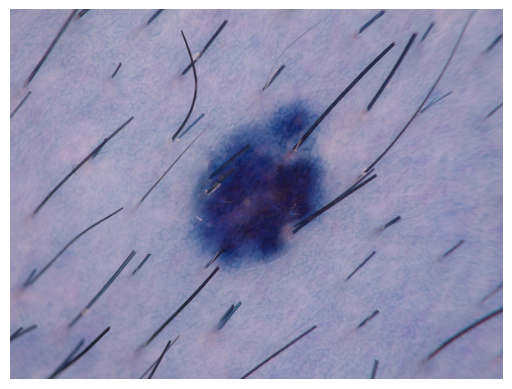

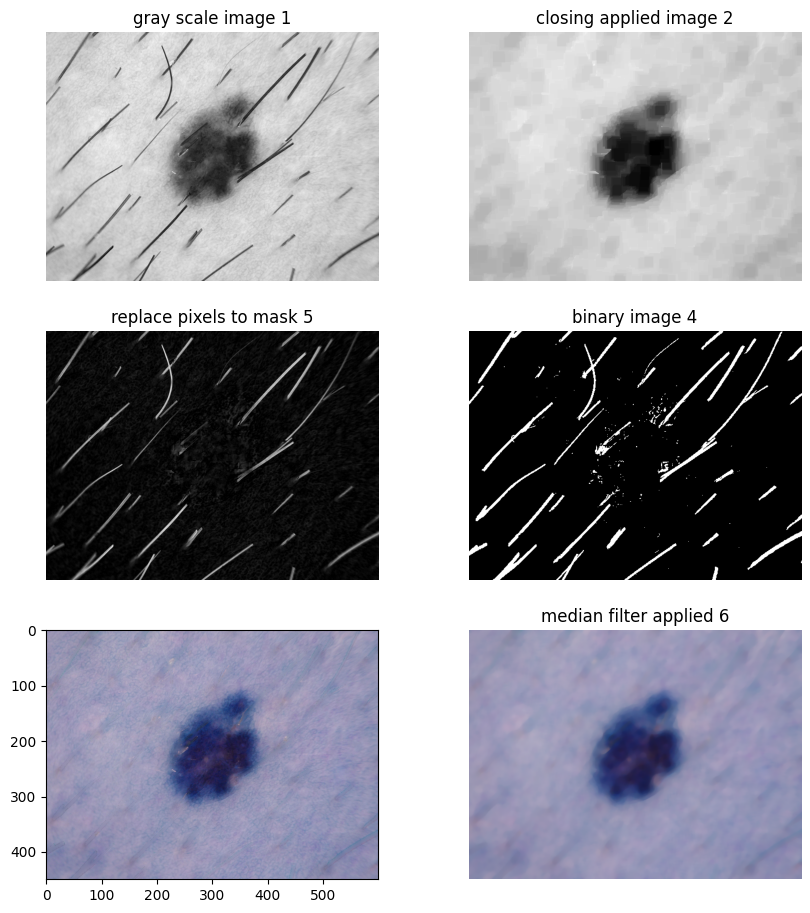

In [55]:
path = './data/binary/train/nevus/'
image_num = "00008"
image = get_image(image_num, path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((15,15),np.uint8)
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
# plt.imshow(closing)
difference_image = closing - gray
# plt.imshow(difference_image)
# binary thresholding
ret,image_thresholded = cv2.threshold(difference_image,20,255,cv2.THRESH_BINARY)
# plt.imshow(image_thresholded)
#Replace pixels of the mask
dst = cv2.inpaint(image,image_thresholded,6,cv2.INPAINT_TELEA)
# plt.imshow(dst)
# apply median filter to remove the leftover blackies
median_filter = cv2.medianBlur(dst, 9)
# plt.imshow(median_filter)
# cv2.imwrite('test_hair_median_applied.png', median_filter)

f, ax = plt.subplots(3, 2, figsize=(10,11))
ax[0, 0].imshow(gray, cmap='gray')
ax[0, 0].axis('off')
ax[0, 0].set_title("gray scale image 1")
ax[0, 1].imshow(closing, cmap='gray')
ax[0, 1].axis('off')
ax[0, 1].set_title(f"closing applied image 2")

ax[1, 0].imshow(difference_image, cmap='gray')
ax[1, 0].axis('off')
ax[1, 0].set_title("difference image 3")
ax[1, 1].imshow(image_thresholded, cmap='gray')
ax[1, 1].axis('off')
ax[1, 1].set_title("binary image 4")

ax[2, 0].imshow(dst, cmap='gray')
ax[1, 0].axis('off')
ax[1, 0].set_title("replace pixels to mask 5")
ax[2, 1].imshow(median_filter, cmap='gray')
ax[2, 1].axis('off')
ax[2, 1].set_title("median filter applied 6")

plt.show()




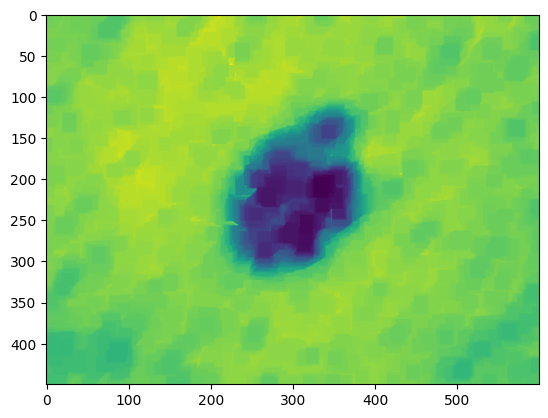

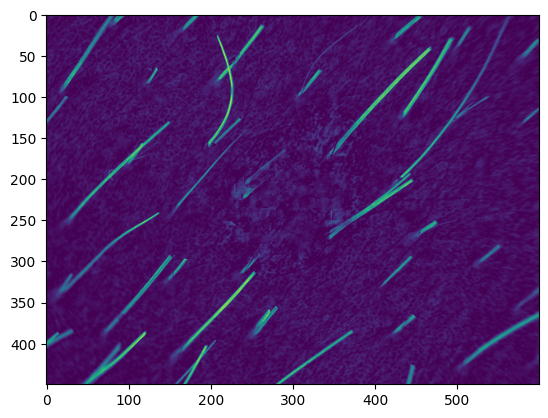

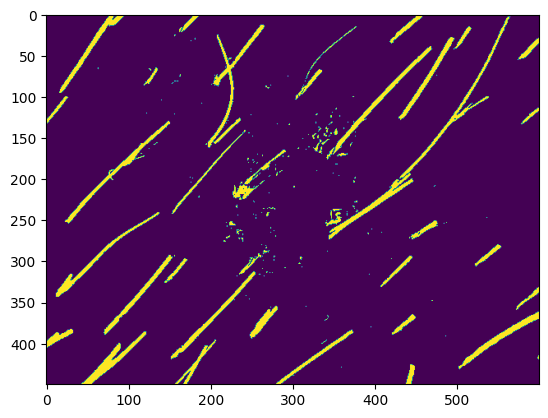

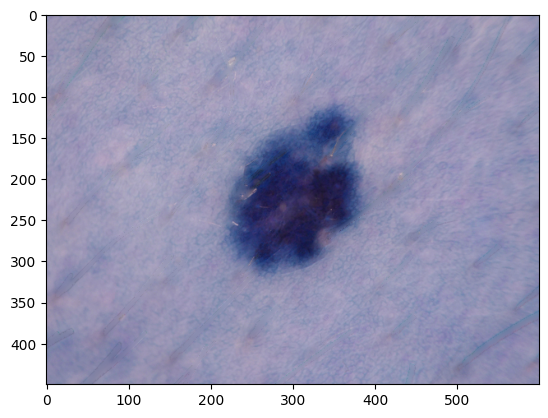

In [43]:
cv2.imwrite('test_hair_2_kernel_change_old_img.png', dst)

True

True

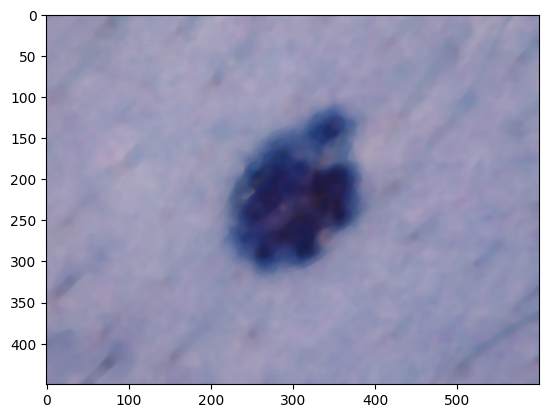